In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const

In [2]:
def sigma(x, y, dx, dy, label):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    print('Sigmaabweichung {} ='.format(str(label)), s)

---

In [3]:
#Messdaten:
Z = np.array([26, 42, 47, 40, 29, 28, 22, 30])
Ea = np.array([6.39, 17.52, 22.03, 15.86, 8.04, 7.45, 4.63, 8.65])
dEa = np.array([0.2, 0.21, 0.22, 0.21, 0.21, 0.21, 0.19, 0.21])
Eb = np.array([6.99, 19.65, 24.72, 17.75, 8.89, 8.19, 4.92, 9.59])
dEb = np.array([0.23, 0.21, 0.21, 0.23, 0.24, 0.27, 0.29, 0.24])

sqEa = np.sqrt(Ea)
dsqEa = dEa /(2*sqEa)

sqEb = np.sqrt(Eb)
dsqEb = dEa /(2*sqEb)

# Auswertung $K_\alpha$-Linien


Text(0, 0.5, '$\\sqrt{E_\\alpha} \\ \\ \\ \\left[ \\ \\sqrt{keV} \\ \\right]$ ')

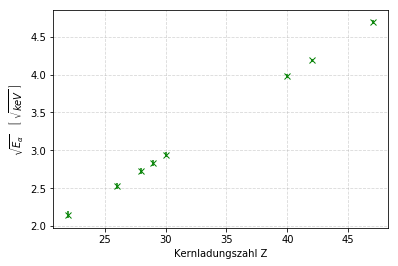

In [4]:
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(Z, sqEa, yerr=dsqEa, fmt="x", color='green')
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\alpha} \ \ \ \left[ \ \sqrt{keV} \ \right]$ ')

In [5]:
#Fitfunction
n1=1
n2=2
def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)

In [6]:
popta, pcova = curve_fit(fit_func, Z, sqEa, sigma=dsqEa, absolute_sigma=True)

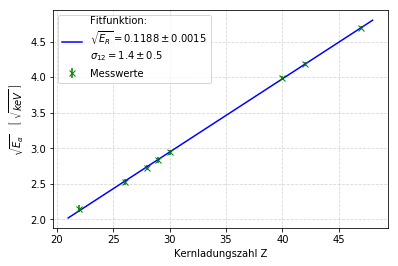

In [7]:
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(Z, sqEa, yerr=dsqEa, fmt="x", color='green', label='Messwerte')
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\alpha} \ \ \ \left[ \ \sqrt{keV} \ \right]$ ')
x = np.linspace(21,48,100)
plt.plot(x, fit_func(x, *popta), color='blue', 
        label="\n".join([r"Fitfunktion:", 
                          r'$\sqrt{} = {:.4f} \pm {:.2}$'.format('{E_R}',popta[0], np.sqrt(pcova[0][0])), 
                          r'$\sigma_{} = {:.1f} \pm {:.1}$'.format('{12}', popta[1], np.sqrt(pcova[1][1]))]))
_ = plt.legend()
plt.savefig('./plots/Ka.pdf', format='PDF')

In [8]:
print("sqrt_Er =",popta[0], ", Standardfehler =",np.sqrt(pcova[0][0]))
print("sig12 =",popta[1], ", Standardfehler =",np.sqrt(pcova[1][1]))

sqrt_Er = 0.11882324370620102 , Standardfehler = 0.0015334758796074835
sig12 = 1.360423799013347 , Standardfehler = 0.4697625324088782


In [9]:
Er_1 = 1000 * popta[0]**2
dEr_1 = 1000 * 2 * popta[0] * np.sqrt(pcova[0][0])

print('Rydbergenergie = ( {} +/- {} ) eV'.format(Er_1, dEr_1))

Rydbergenergie = ( 14.118963244863242 +/- 0.364425156320362 ) eV


In [10]:
Er_lit = 13.605693 #eV

sigma(Er_1, Er_lit, dEr_1, 0, 'Er_1')
sigma(popta[1], 1, np.sqrt(pcova[1][1]), 0, 'sig12')

Sigmaabweichung Er_1 = 1.4084380179617215
Sigmaabweichung sig12 = 0.7672467984305663


# Auswertung $K_\beta$-Linien

In [11]:
n2 = 3
poptb, pcovb = curve_fit(fit_func, Z, sqEb, sigma=dsqEb, absolute_sigma=True)

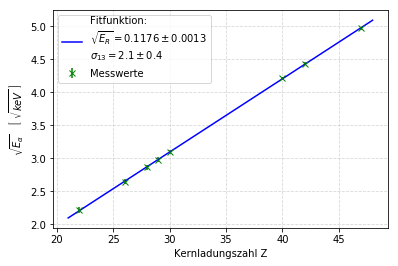

In [12]:
plt.grid(alpha=0.5, linestyle='--')
plt.errorbar(Z, sqEb, yerr=dsqEb, fmt="x", color='green', label='Messwerte')
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\alpha} \ \ \ \left[ \ \sqrt{keV} \ \right]$ ')
x = np.linspace(21,48,100)
plt.plot(x, fit_func(x, *poptb), color='blue', 
        label="\n".join([r"Fitfunktion:", 
                          r'$\sqrt{} = {:.4f} \pm {:.2}$'.format('{E_R}',poptb[0], np.sqrt(pcovb[0][0])), 
                          r'$\sigma_{} = {:.1f} \pm {:.1}$'.format('{13}', poptb[1], np.sqrt(pcovb[1][1]))]))
_ = plt.legend()
plt.savefig('./plots/Kb.pdf', format='PDF')

In [13]:
print("sqrt_Er =",poptb[0], ", Standardfehler =",np.sqrt(pcovb[0][0]))
print("sig13 =",poptb[1], ", Standardfehler =",np.sqrt(pcovb[1][1]))

sqrt_Er = 0.11761111778982336 , Standardfehler = 0.0013417589236683024
sig13 = 2.0857703619093395 , Standardfehler = 0.4082610763157262


In [14]:
Er_2 = 1000 * poptb[0]**2
dEr_2 = 1000 * 2 * poptb[0] * np.sqrt(pcovb[0][0])

print('Rydbergenergie = ( {} +/- {} ) eV'.format(Er_2, dEr_2))

Rydbergenergie = ( 13.832375027771704 +/- 0.3156115336341987 ) eV


In [15]:
sigma(Er_2, Er_lit, dEr_2, 0, 'Er_2')
sigma(poptb[1], 1, np.sqrt(pcovb[1][1]), 0, 'sig13')

Sigmaabweichung Er_2 = 0.7182311278726377
Sigmaabweichung sig13 = 2.6595000721294957
